In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv 
import seaborn as sns 

## Notebook for plotting KPIs

In [15]:
# #frame TP     FP     TN     FN
# 0	1970	17865	877444	24321

In [16]:
def calculate_accuracy(tp, fp, tn, fn):
    return round(tp / (fp + tp + fn), 2)

In [58]:
def plot_accuracy_over_time(df,video_name):
    # Read data from the CSV file

    # Calculate accuracy for each row
    df['accuracy'] = df.apply(lambda x: calculate_accuracy(x[1], x[2], x[3], x[4]), axis=1)

   
    # Add labels and title to the plot
    df.plot(x=0, y='accuracy', kind='line')
    plt.xlabel('Frame')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Time')
    plt.legend()

    # Save the plot to a PNG file
    plt.savefig(f'./result_plots/{video_name}.png',facecolor='w', edgecolor='w')

    # Show the plot
    plt.show()

In [68]:
import os
list = os.listdir("./dataset")
list= [x[:-4] for x in list if x.endswith(".mp4")]
list

['Norway_ferry',
 'Toronto',
 'Japan',
 'Norway',
 'Zurich',
 'Busan',
 'Sariyer',
 'Los Angeles',
 'Busan_2',
 'Moscow',
 'Istanbul_3',
 'Red_Curve_Tokyo',
 'Istanbul_2',
 'Tokyo Curved Right',
 'Chicago',
 'Vaduz',
 'Seattle',
 'Istanbul_Bridge']

In [82]:
videos= ['Norway_ferry',
 'Toronto',
 'Japan',
 'Norway',
 'Zurich',
 'Sariyer',
 'Los Angeles',
 'Busan_2',
 'Moscow',
 'Istanbul_3',
 'Red_Curve_Tokyo',
 'Istanbul_2',
 'Tokyo Curved Right',
 'Chicago',
 'Vaduz',
 'Seattle',
 'Istanbul_Bridge']

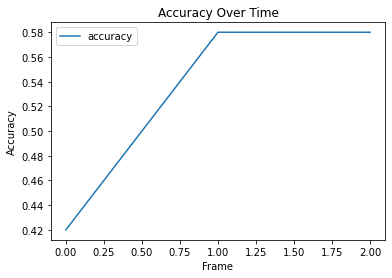

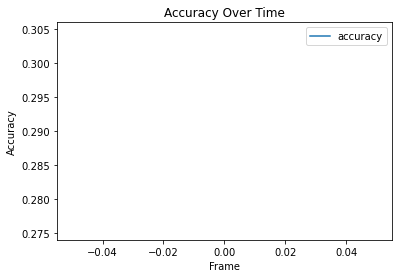

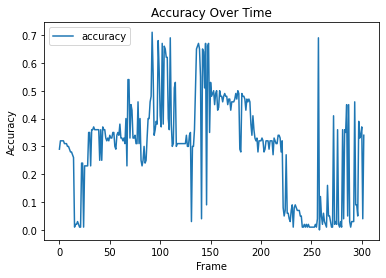

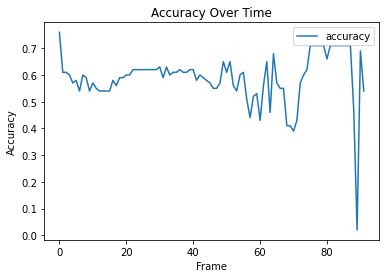

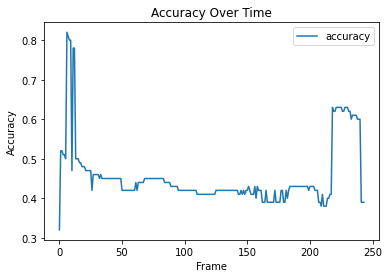

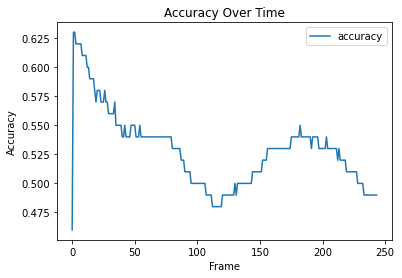

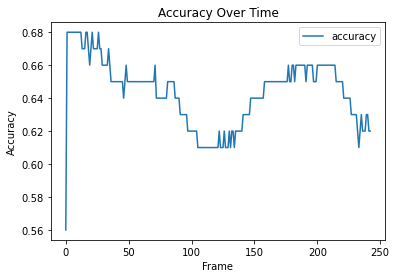

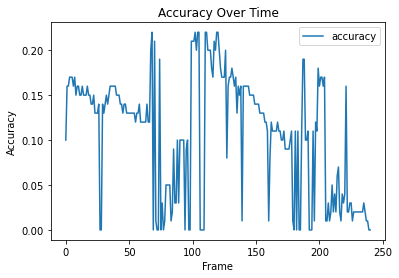

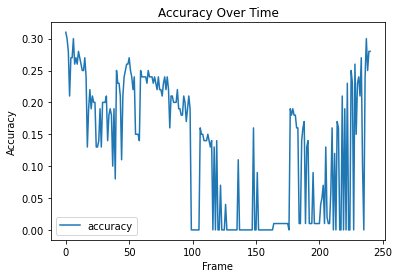

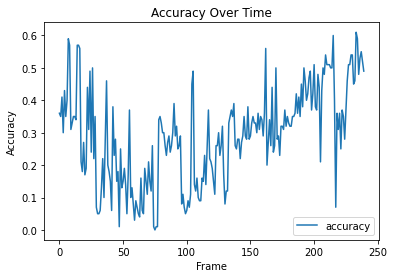

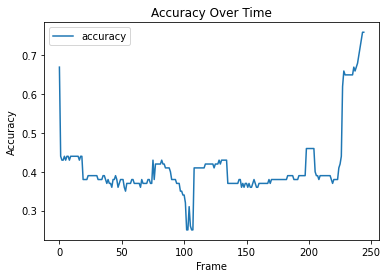

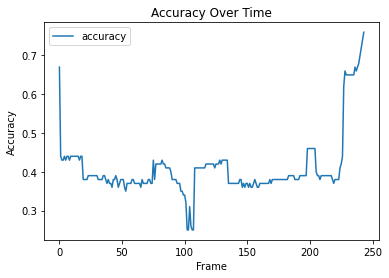

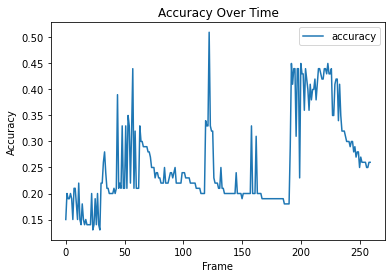

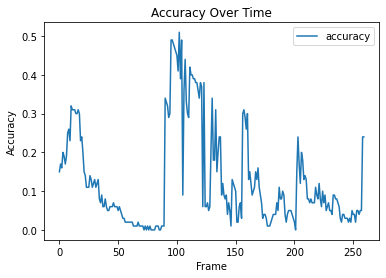

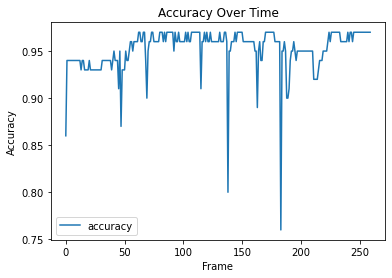

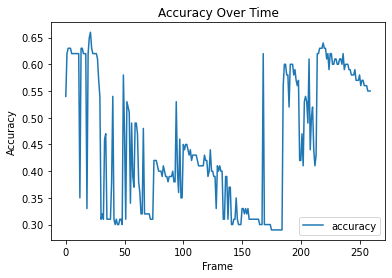

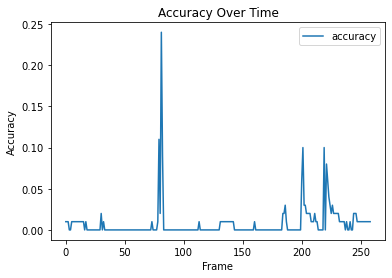

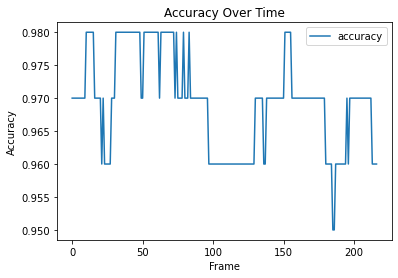

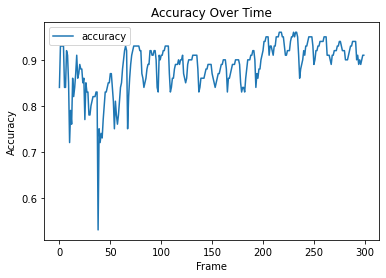

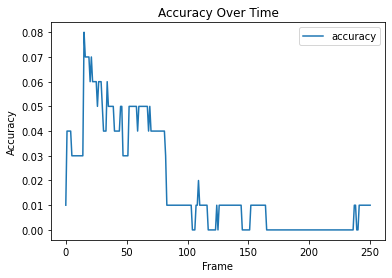

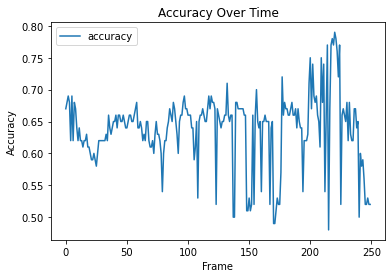

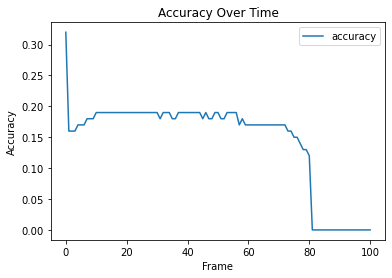

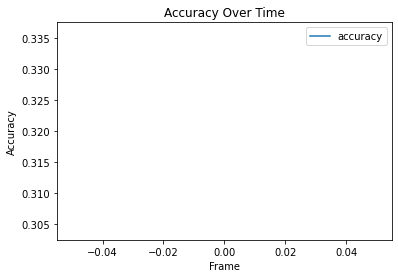

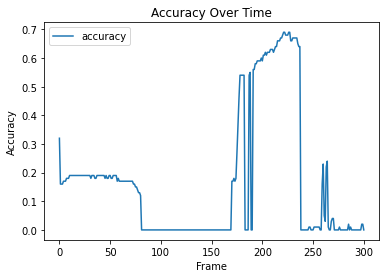

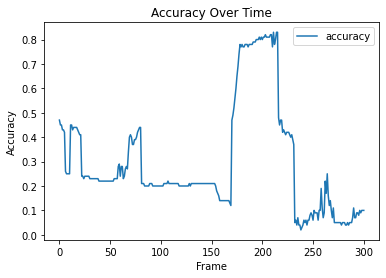

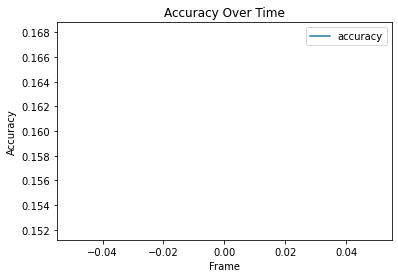

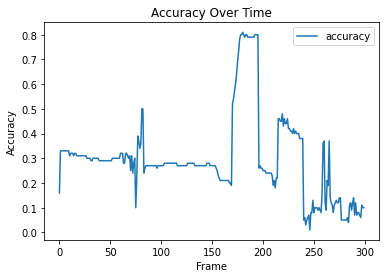

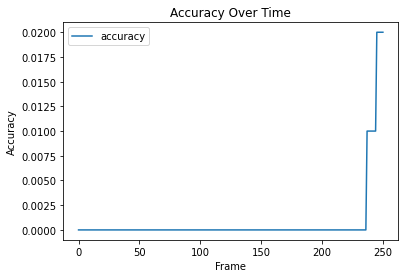

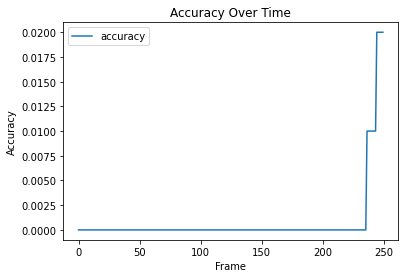

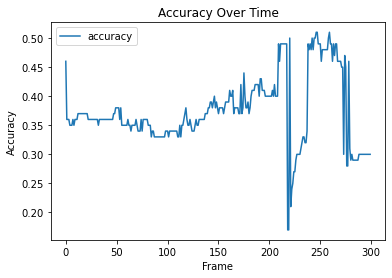

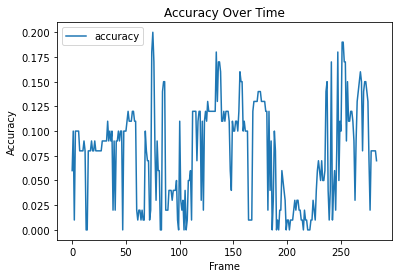

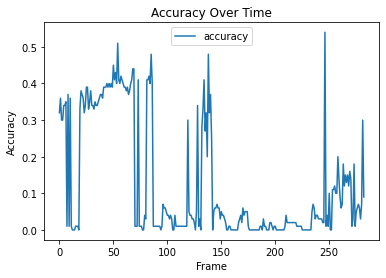

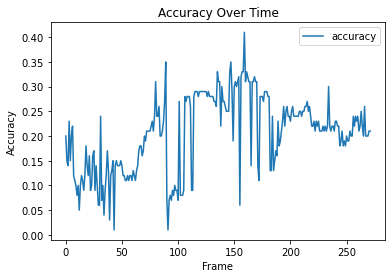

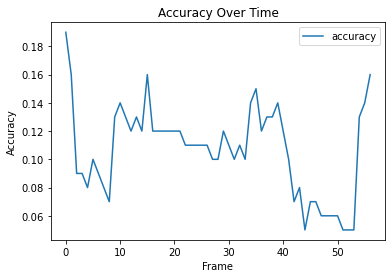

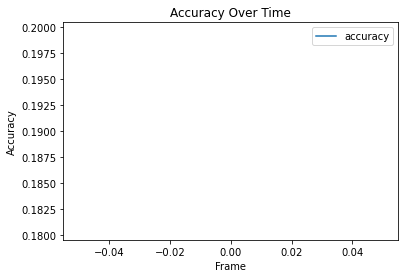

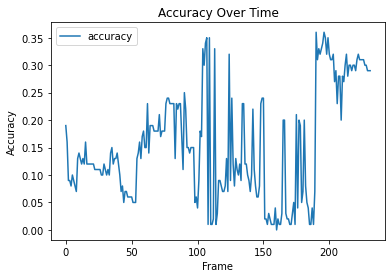

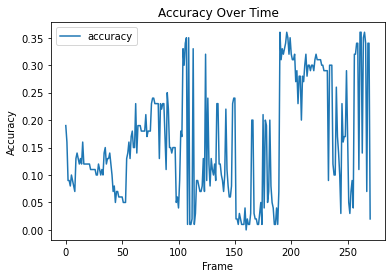

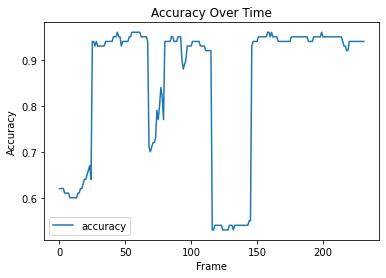

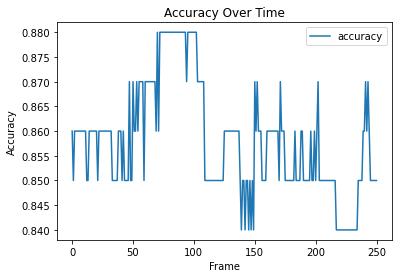

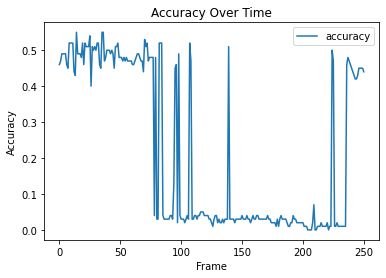

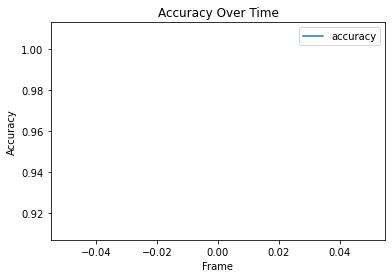

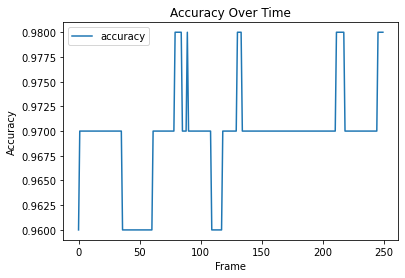

In [84]:
for video in videos:
    df = pd.read_csv(f"./hyperautomation_KPIs/{video}.csv",  header=None)
    split_indices = df.index[df[0] == 0].tolist()
    split_indices.append(df.index[-1])
    df_list = [df.iloc[i:j,:] for i, j in zip(split_indices, split_indices[1:])]

    # Save each dataframe to a separate CSV file
    for runs, df in enumerate(df_list):
        plot_accuracy_over_time(df, f'Hyperautomation - {video} - Run {runs}')